In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
df = pd.read_csv('ice_cream.csv')

In [14]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [15]:
# rename columns
df.rename(columns= {'DATE':'date', 'IPN31152N': 'production'}, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        577 non-null    object 
 1   production  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [18]:
## converting date from object to datetime type 
df['date'] = pd.to_datetime(df.date)

## set date as index
df.set_index('date', inplace = True)

In [26]:
df.tail()

,production
date,
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223
2019-12-01,75.7094
2020-01-01,83.6290


In [25]:
# getting a subset of data

df_sub = df.loc['2010-01-01':]

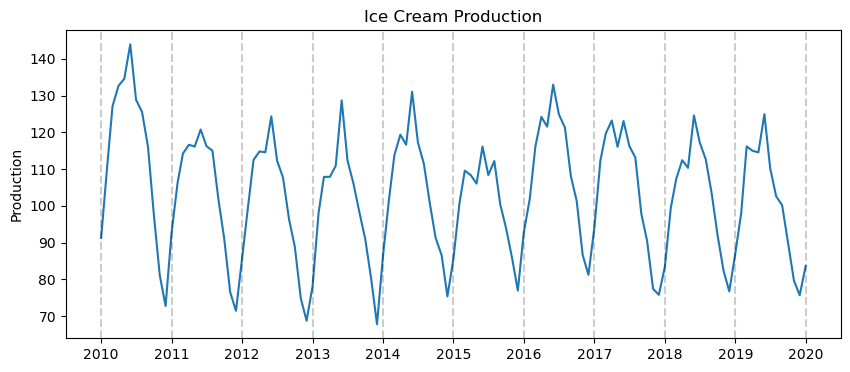

In [34]:
plt.figure(figsize = (10,4))
plt.plot(df_sub.production)
plt.title('Ice Cream Production')
plt.ylabel('Production')

# adding vertical line along the axes
for year in range(2010, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color = 'k', linestyle = '--', alpha = 0.2)


## Auto Correlation Function (ACF)
Autocorrelation measures how a time series is correlated with a lagged version of itself. For example, it tells you how much the value at time $t$ is related to the value at time $t−k$, where $k$ is the lag.


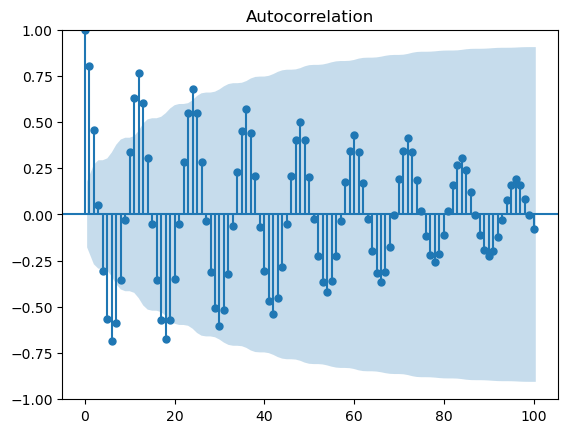

In [42]:
acf_plot = plot_acf(df_sub.production, lags = 100)

### Based on decaying ACF, we are likely dealing with an Auto Regressive process


## Partial Auto Correlation Function (PACF)

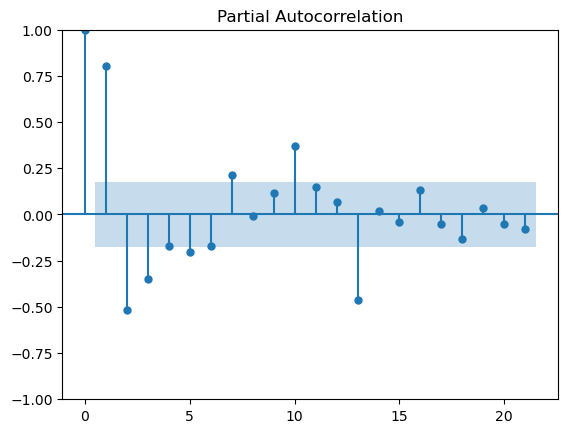

In [37]:
pacf_plot = plot_pacf(df_sub.production)

### Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13 


## Stock Data

In [49]:
import yfinance as yf

# SPY is SPDR S&P 500 ETF Trust. It is one of the most widely traded exchange-traded funds (ETFs) 
tickerSymbol = 'SPY'

tickerdata = yf.Ticker(tickerSymbol)

df_stock  = tickerdata.history(period='1d', start='2015-1-1', end='2020-1-1')


In [51]:
df_stock = df_stock[['Close']]

In [52]:
df_stock

,Close
Date,
2015-01-02 00:00:00-05:00,173.704926
2015-01-05 00:00:00-05:00,170.567886
2015-01-06 00:00:00-05:00,168.961304
2015-01-07 00:00:00-05:00,171.066788
2015-01-08 00:00:00-05:00,174.102341
...,...
2019-12-24 00:00:00-05:00,299.739075
2019-12-26 00:00:00-05:00,301.334717
2019-12-27 00:00:00-05:00,301.260071


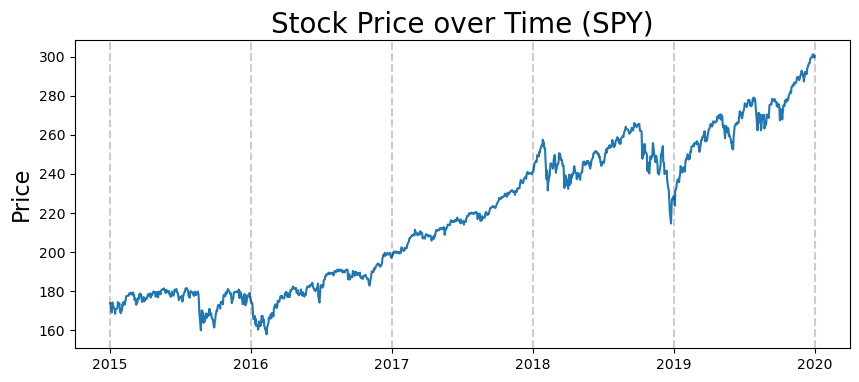

In [53]:
plt.figure(figsize=(10,4))
plt.plot(df_stock.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [54]:
## data is not stationary, so lets start by plotting the difference of data between t and t-1

In [63]:
df_stock['FirstDiff'] = df_stock['Close'].diff().fillna(0) 

In [65]:
df_stock

,Close,FirstDiff
Date,,
2015-01-02 00:00:00-05:00,173.704926,0.000000
2015-01-05 00:00:00-05:00,170.567886,-3.137039
2015-01-06 00:00:00-05:00,168.961304,-1.606583
2015-01-07 00:00:00-05:00,171.066788,2.105484
2015-01-08 00:00:00-05:00,174.102341,3.035553
...,...,...
2019-12-24 00:00:00-05:00,299.739075,0.009277
2019-12-26 00:00:00-05:00,301.334717,1.595642
2019-12-27 00:00:00-05:00,301.260071,-0.074646


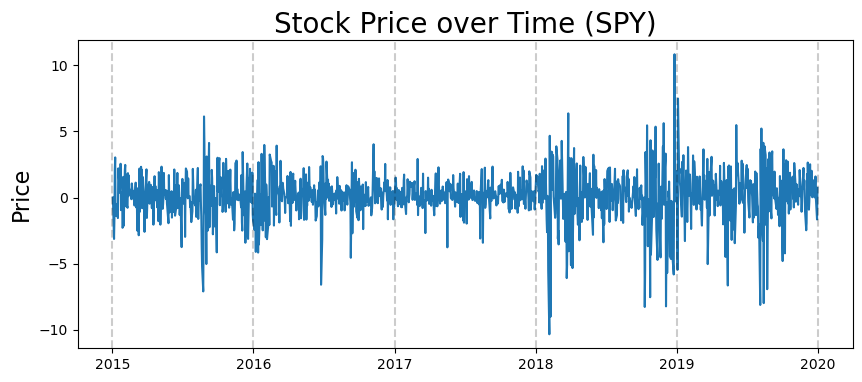

In [67]:
plt.figure(figsize=(10,4))
plt.plot(df_stock.FirstDiff)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

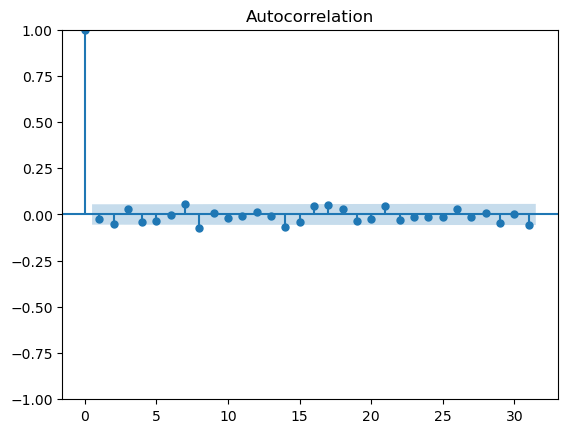

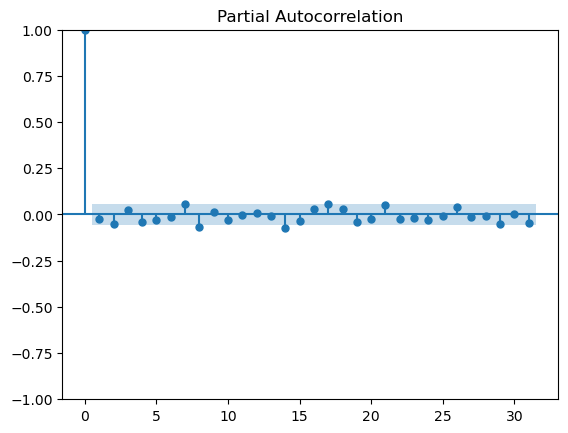

In [73]:
## ACF and PACF
acf = plot_acf(df_stock.FirstDiff)
pacf = plot_pacf(df_stock.FirstDiff)

#### These ACF and PACF for the stock doesnt aren't much informative, no idea for correlation between different lags. This makes Stock prediction a bit difficult